In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [3]:
df = pd.read_excel("retail_sales_dataset.xlsx")
df.head()

,CustomerID,FirstName,LastName,Gender,BirthDate,City,JoinDate
0,C001,Michael,Davis,M,1996-09-11,Osborneport,2022-09-25
1,C002,Michael,Miller,M,1959-08-18,New Gabrielleport,2020-11-03
2,C003,Carol,Hays,F,2005-04-19,Port Allen,2024-02-12
3,C004,Joseph,Ward,M,1992-06-16,East Edgarborough,2024-09-09
4,C005,Jamie,Salinas,M,1992-06-18,Port Kimberly,2022-02-24


### Basic info

In [147]:
df.shape

(200, 7)

In [148]:
df.isnull().sum()

CustomerID    0
FirstName     0
LastName      0
Gender        0
BirthDate     0
City          0
JoinDate      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CustomerID  200 non-null    object        
 1   FirstName   200 non-null    object        
 2   LastName    200 non-null    object        
 3   Gender      200 non-null    object        
 4   BirthDate   200 non-null    datetime64[ns]
 5   City        200 non-null    object        
 6   JoinDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(5)
memory usage: 11.1+ KB


In [149]:
df.columns

Index(['CustomerID', 'FirstName', 'LastName', 'Gender', 'BirthDate', 'City',
       'JoinDate'],
      dtype='object')

### 4 Business Insights:

In [ ]:
"""
1. Customer Acquisition Trends    --> identify growth patterns and seasonal trends
2. Customer Demographics Analysis --> for targeted marketing
3. Geographic Distribution        --> which cities have the highest customer concentration?
4. Customer Loyalty & Tenure      --> Calculate how long customers have been with the business and identify loyal segments

"""

### 1. Customer Acquisition Trends

In [4]:
df.head()

,CustomerID,FirstName,LastName,Gender,BirthDate,City,JoinDate
0,C001,Michael,Davis,M,1996-09-11,Osborneport,2022-09-25
1,C002,Michael,Miller,M,1959-08-18,New Gabrielleport,2020-11-03
2,C003,Carol,Hays,F,2005-04-19,Port Allen,2024-02-12
3,C004,Joseph,Ward,M,1992-06-16,East Edgarborough,2024-09-09
4,C005,Jamie,Salinas,M,1992-06-18,Port Kimberly,2022-02-24


In [7]:
## extract year and month 

df['JoinYear'] = df['JoinDate'].dt.year
df['JoinMonth'] = df['JoinDate'].dt.month
df['JoinYearMonth'] = df['JoinDate'].dt.to_period('M')

In [8]:
df["JoinYear"].unique()

array([2022, 2020, 2024, 2021, 2025, 2023], dtype=int32)

In [9]:
# Find peak month (from all years)
monthly_counts = df['JoinMonth'].value_counts().sort_index()
monthly_counts # 1 -> 21 (max)

peak_month = monthly_counts.idxmax()
peak_month # 1

peak_month_count = monthly_counts.max()
peak_month_count # 21

21

In [10]:
# Find peak year
yearly_counts = df['JoinYear'].value_counts().sort_index()
yearly_counts # 2022 -> 45 (max)
peak_year = yearly_counts.idxmax()
peak_year_count = yearly_counts.max()
peak_year_count

45

In [11]:
print("PEAK ACQUISITION ANALYSIS:")
print("-" * 50)

print(f"Peak Month(All Years): Month {peak_month} with {peak_month_count} customers")
print(f"Peak Year: {peak_year} with {peak_year_count} customers")

PEAK ACQUISITION ANALYSIS:
--------------------------------------------------
Peak Month(All Years): Month 1 with 21 customers
Peak Year: 2022 with 45 customers


Text(0, 0.5, 'New Customers')

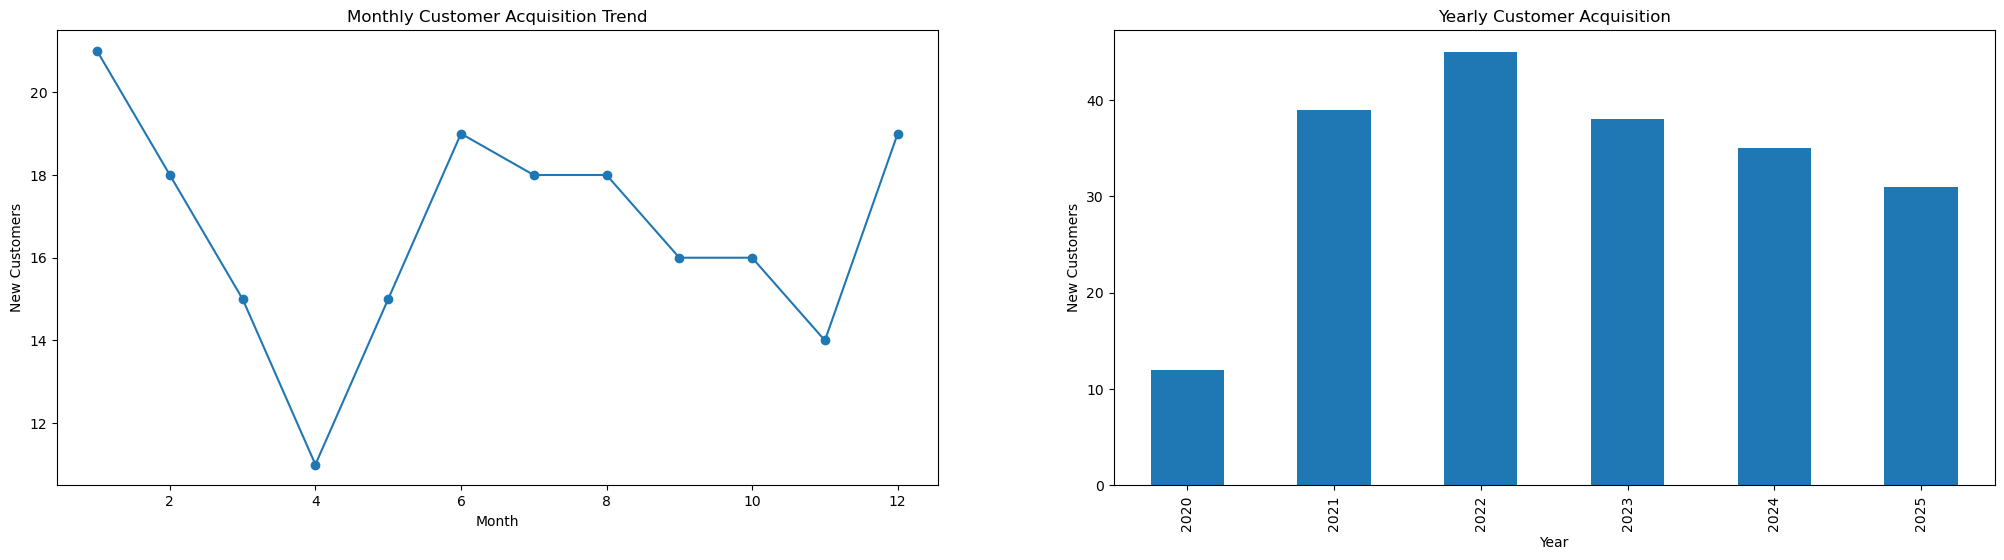

In [12]:
plt.figure(figsize=(25, 13))

# Monthly Acquisition Trend:
plt.subplot(2, 2, 1)
monthly_acquisition = df.groupby('JoinMonth').size()
monthly_acquisition.plot(kind='line', marker='o')
plt.title('Monthly Customer Acquisition Trend')
plt.xlabel('Month')
plt.ylabel('New Customers')


# Yearly Acquisition:
plt.subplot(2, 2, 2)
yearly_acquisition = df['JoinYear'].value_counts().sort_index()
yearly_acquisition.plot(kind='bar')
plt.title('Yearly Customer Acquisition')
plt.xlabel('Year')
plt.ylabel('New Customers')



### 2. Customer Demographics Analysis

In [13]:
df.head()

,CustomerID,FirstName,LastName,Gender,BirthDate,City,JoinDate,JoinYear,JoinMonth,JoinYearMonth
0,C001,Michael,Davis,M,1996-09-11,Osborneport,2022-09-25,2022,9,2022-09
1,C002,Michael,Miller,M,1959-08-18,New Gabrielleport,2020-11-03,2020,11,2020-11
2,C003,Carol,Hays,F,2005-04-19,Port Allen,2024-02-12,2024,2,2024-02
3,C004,Joseph,Ward,M,1992-06-16,East Edgarborough,2024-09-09,2024,9,2024-09
4,C005,Jamie,Salinas,M,1992-06-18,Port Kimberly,2022-02-24,2022,2,2022-02


In [14]:
# calc age from BirthDate

curr_date = pd.to_datetime("2025-10-16")
df["Age"] = (curr_date - df['BirthDate']).dt.days // 365

In [15]:
df['Gender'].value_counts()

Gender
M    113
F     87
Name: count, dtype: int64

In [16]:
df["Age"].min() # 18
df["Age"].max() # 71

71

In [18]:
age_counts = df["Age"].value_counts().sort_index()
age_counts

Age
18    1
19    5
20    8
21    5
22    5
23    3
24    1
25    4
27    4
28    6
29    3
30    2
31    4
32    3
33    3
34    5
35    5
36    2
37    4
38    3
39    3
40    6
41    3
42    1
43    5
44    3
45    3
46    3
47    5
48    3
49    5
50    6
51    2
52    6
53    2
54    4
55    4
56    2
57    3
58    4
59    3
60    5
61    5
62    4
63    5
64    8
65    6
66    4
67    3
68    2
69    2
70    2
71    2
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

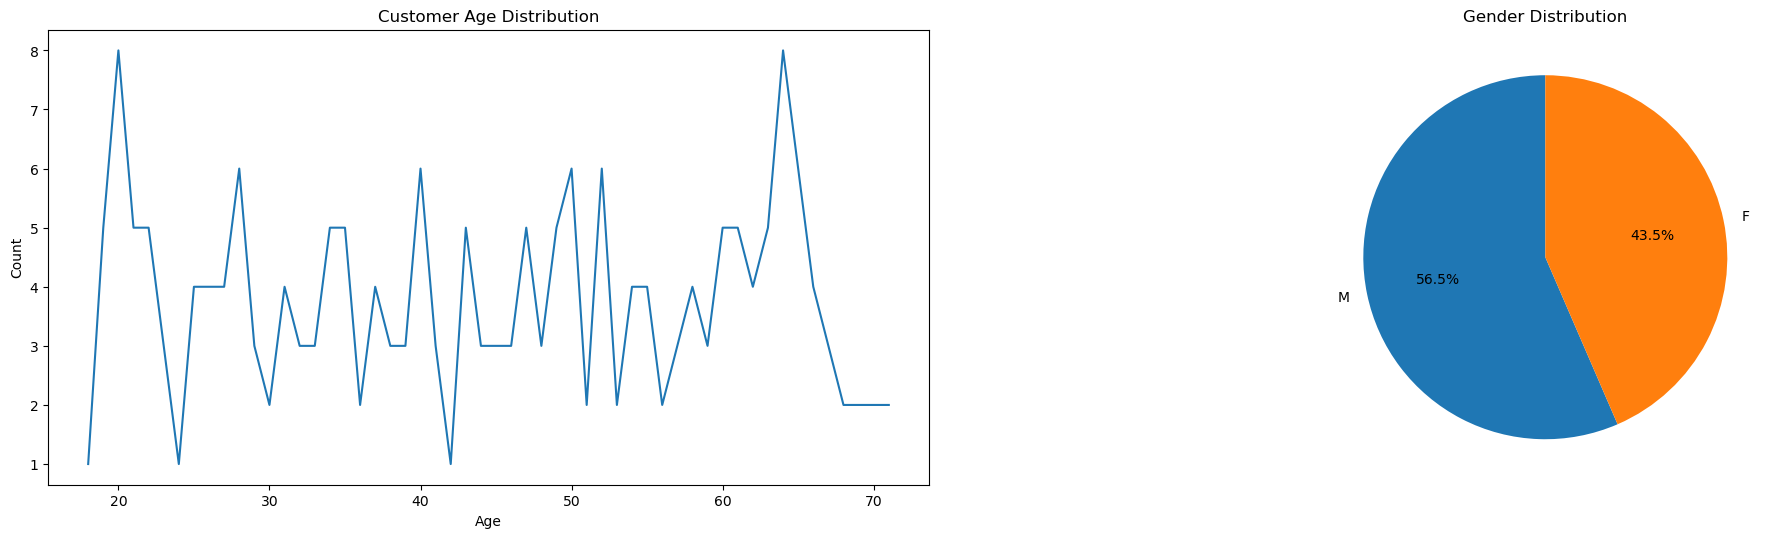

In [19]:
plt.figure(figsize=(25, 13))

# Age Distribution:
plt.subplot(2, 2, 1)
#sns.histplot(data=df, x='Age', bins=20)
sns.lineplot(x = age_counts.index, y = age_counts.values)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Gender Distribution:
plt.subplot(2, 2, 2)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

In [20]:
print("DEMOGRAPHICS INSIGHTS:")
print("-"*50)
print(f"Average Customer Age: {df['Age'].mean():.1f} years")
print(f"Gender Distribution:\n{df['Gender'].value_counts()}")

DEMOGRAPHICS INSIGHTS:
--------------------------------------------------
Average Customer Age: 44.5 years
Gender Distribution:
Gender
M    113
F     87
Name: count, dtype: int64


### 3. Geographic Distribution

In [21]:
df.head()

,CustomerID,FirstName,LastName,Gender,BirthDate,City,JoinDate,JoinYear,JoinMonth,JoinYearMonth,Age
0,C001,Michael,Davis,M,1996-09-11,Osborneport,2022-09-25,2022,9,2022-09,29
1,C002,Michael,Miller,M,1959-08-18,New Gabrielleport,2020-11-03,2020,11,2020-11,66
2,C003,Carol,Hays,F,2005-04-19,Port Allen,2024-02-12,2024,2,2024-02,20
3,C004,Joseph,Ward,M,1992-06-16,East Edgarborough,2024-09-09,2024,9,2024-09,33
4,C005,Jamie,Salinas,M,1992-06-18,Port Kimberly,2022-02-24,2022,2,2022-02,33


In [22]:
city_distribution = df['City'].value_counts().unique()
city_distribution

array([1])

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(-25.0, 0, 'West Amymouth'),
  Text(0.0, 0, 'Osborneport'),
  Text(25.0, 0, 'Shepherdburgh'),
  Text(50.0, 0, 'Boyerstad'),
  Text(75.0, 0, 'Nancyside'),
  Text(100.0, 0, 'North Gary'),
  Text(125.0, 0, 'West Paulfurt'),
  Text(150.0, 0, 'South Audrey'),
  Text(175.0, 0, 'West Amymouth'),
  Text(200.0, 0, ''),
  Text(225.0, 0, '')])

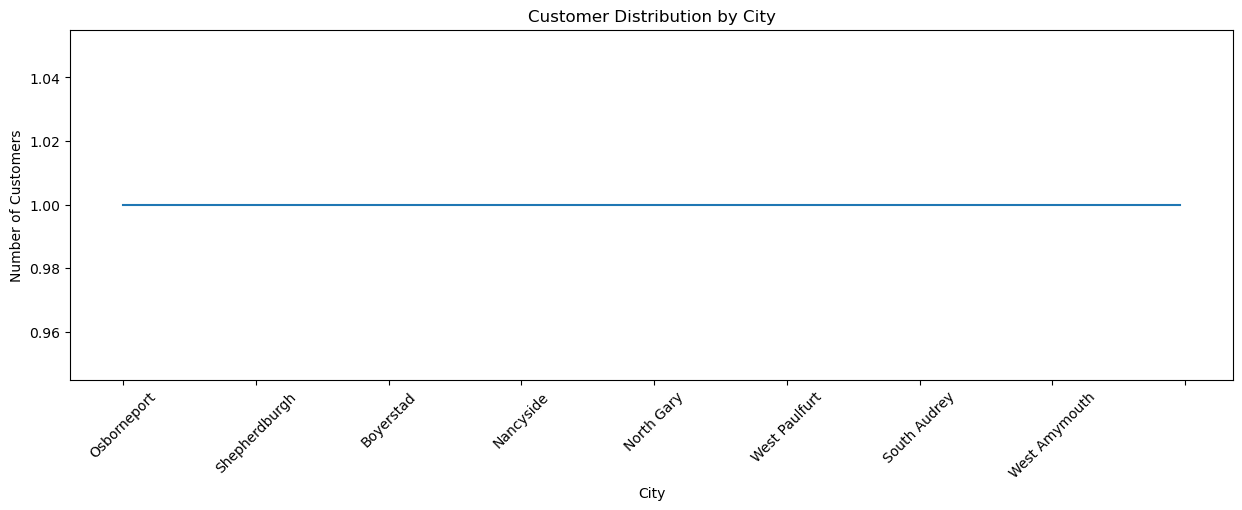

In [23]:
plt.figure(figsize=(15, 10))

# City-wise Customer Count
plt.subplot(2, 1, 1)
city_counts = df['City'].value_counts()
city_counts.plot(kind='line')
plt.title('Customer Distribution by City')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)


In [24]:
print("Geographic Distribution Insights:")
print("-"*40)
print("Business serves customers across {} unique locations".format(df['City'].nunique()))

Geographic Distribution Insights:
----------------------------------------
Business serves customers across 200 unique locations


### 4. Customer Loyalty & Tenure Analysis

In [25]:
df.head()

,CustomerID,FirstName,LastName,Gender,BirthDate,City,JoinDate,JoinYear,JoinMonth,JoinYearMonth,Age
0,C001,Michael,Davis,M,1996-09-11,Osborneport,2022-09-25,2022,9,2022-09,29
1,C002,Michael,Miller,M,1959-08-18,New Gabrielleport,2020-11-03,2020,11,2020-11,66
2,C003,Carol,Hays,F,2005-04-19,Port Allen,2024-02-12,2024,2,2024-02,20
3,C004,Joseph,Ward,M,1992-06-16,East Edgarborough,2024-09-09,2024,9,2024-09,33
4,C005,Jamie,Salinas,M,1992-06-18,Port Kimberly,2022-02-24,2022,2,2022-02,33


In [34]:
# Create and Analysis loyalty segments

def create_loyalty_segments(df):
    # define loyalty segments
    conditions = [
        (df['TenureMonths'] < 6),
        (df['TenureMonths'] >= 6) & (df['TenureMonths'] < 12),
        (df['TenureMonths'] >= 12) & (df['TenureMonths'] < 24),
        (df['TenureMonths'] >= 24) & (df['TenureMonths'] < 36),
        (df['TenureMonths'] >= 36)
    ]
    
    segments = ['New (<6m)', 'Growing (6-12m)', 'Established (1-2y)', 'Loyal (2-3y)', 'Champion (>3y)']
    df['LoyaltySegment'] = np.select(conditions, segments, default='New (<6m)')
    
    return df

df = create_loyalty_segments(df)

In [35]:
loyalty_counts = df['LoyaltySegment'].value_counts()
loyalty_counts

LoyaltySegment
Champion (>3y)        87
Loyal (2-3y)          41
Established (1-2y)    34
New (<6m)             21
Growing (6-12m)       17
Name: count, dtype: int64

In [284]:
loyalty_percentage = (loyalty_counts / len(df)) * 100
loyalty_percentage

LoyaltySegment
Champion (>3y)        43.5
Loyal (2-3y)          20.5
Established (1-2y)    17.0
New (<6m)             10.5
Growing (6-12m)        8.5
Name: count, dtype: float64

In [36]:
print("LOYALTY SEGMENT DISTRIBUTION:")
print("-"*40)

for segment, count in loyalty_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{segment}: {count} customers ({percentage:.1f}%)")

LOYALTY SEGMENT DISTRIBUTION:
----------------------------------------
Champion (>3y): 87 customers (43.5%)
Loyal (2-3y): 41 customers (20.5%)
Established (1-2y): 34 customers (17.0%)
New (<6m): 21 customers (10.5%)
Growing (6-12m): 17 customers (8.5%)


Text(0.5, 1.0, 'Customer Loyalty Segments')

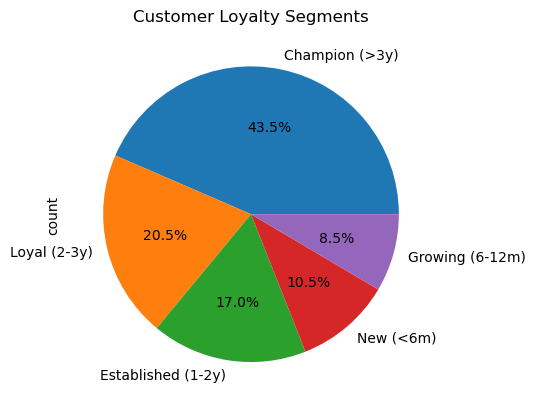

In [286]:
# Loyalty Segments
loyalty_percentage.plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Loyalty Segments')

In [29]:
# Calculate Customer Tenure (in months and years)

df["TenureMonths"] = ((curr_date - df['JoinDate']).dt.days / 30).round(1)
df['TenureYears'] = (df['TenureMonths'] / 12).round(1)

In [30]:
print(f"TENURE BY DEMOGRAPHICS:")
print("-"*40)
tenure_by_gender = df.groupby('Gender')['TenureMonths'].mean()
for gender, tenure in tenure_by_gender.items():
    print(f"  {gender}: {tenure:.1f} months")

TENURE BY DEMOGRAPHICS:
----------------------------------------
  F: 27.9 months
  M: 34.7 months


Text(0.5, 1.0, 'TENURE BY DEMOGRAPHICS:')

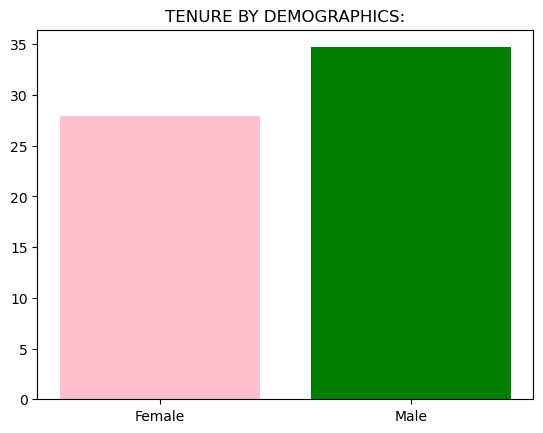

In [281]:
plt.bar(['Female', 'Male'], [27.9, 34.7], color=['pink', 'green'])
plt.title("TENURE BY DEMOGRAPHICS:")

In [31]:
df.head()

,CustomerID,FirstName,LastName,Gender,BirthDate,City,JoinDate,JoinYear,JoinMonth,JoinYearMonth,Age,TenureMonths,TenureYears
0,C001,Michael,Davis,M,1996-09-11,Osborneport,2022-09-25,2022,9,2022-09,29,37.2,3.1
1,C002,Michael,Miller,M,1959-08-18,New Gabrielleport,2020-11-03,2020,11,2020-11,66,60.3,5.0
2,C003,Carol,Hays,F,2005-04-19,Port Allen,2024-02-12,2024,2,2024-02,20,20.4,1.7
3,C004,Joseph,Ward,M,1992-06-16,East Edgarborough,2024-09-09,2024,9,2024-09,33,13.4,1.1
4,C005,Jamie,Salinas,M,1992-06-18,Port Kimberly,2022-02-24,2022,2,2022-02,33,44.3,3.7


In [ ]:
# Analysis " Age vs LoyaltySegment "
loyalty_age_stats = df.groupby('LoyaltySegment')['Age'].agg(['mean', 'median', 'count']).round(1)
print("AGE DISTRIBUTION BY LOYALTY SEGMENT:")
print(loyalty_age_stats)

AGE DISTRIBUTION BY LOYALTY SEGMENT:
                    mean  median  count
LoyaltySegment                         
Champion (>3y)      43.5    43.0     87
Established (1-2y)  45.9    46.5     34
Growing (6-12m)     45.9    47.0     17
Loyal (2-3y)        45.5    46.0     41
New (<6m)           43.7    45.0     21


In [52]:
print("AVERAGE AGE PER LOYALTY SEGMENT:")
avg_age_by_loyalty = df.groupby('LoyaltySegment')['Age'].mean().sort_values(ascending=False)
print(avg_age_by_loyalty.round(1))

AVERAGE AGE PER LOYALTY SEGMENT:
LoyaltySegment
Established (1-2y)    45.9
Growing (6-12m)       45.9
Loyal (2-3y)          45.5
New (<6m)             43.7
Champion (>3y)        43.5
Name: Age, dtype: float64


Text(0, 0.5, 'Loyalty Segment')

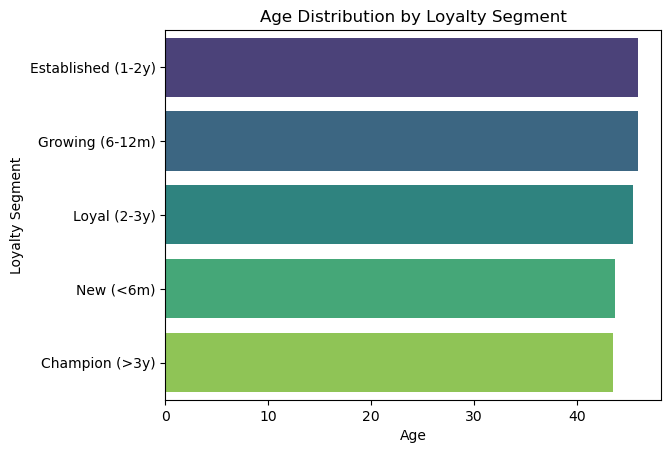

In [53]:
sns.barplot(y=avg_age_by_loyalty.index, x=avg_age_by_loyalty.values, palette="viridis")
plt.title('Age Distribution by Loyalty Segment')
plt.xlabel('Age')
plt.ylabel('Loyalty Segment')